In [5]:
import torch 
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.dataloader import DataLoader
from meta_learning.datasets import SinusoidalDataset, Sinusoid
from meta_learning.utils import acc_regression
from meta_learning.models import SimpleMLP
from meta_learning.meta_grads import reptile_optimize
import random
import copy
import matplotlib.pyplot as plt


nways = 4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

#%%
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
bsize_outer = 16
bsize_inner = 32
dataset = SinusoidalDataset(bsize_outer=bsize_outer, bsize_inner=bsize_inner)
loader = torch.utils.data.DataLoader(dataset, batch_size=None, num_workers=4, batch_sampler=None)

In [7]:
model = SimpleMLP([1, 64, 64, 1]).to(device)
opt_outer = torch.optim.Adam(model.parameters(), lr=2e-1)

In [10]:
eps=1
# ii = 0
# writer = SummaryWriter('tb/reptile_'+str(random.randint(100000, 999999)))
for ep in range(eps):
    for step, (x, y) in enumerate(loader):
        xexamples, xtoguess = x[:, :-1], x[:, -1].unsqueeze(1)
        yexamples, ytoguess = y[:, :-1], y[:, -1].unsqueeze(1)
        loss, accuraccy, _ = reptile_optimize(model, xexamples, yexamples, xtoguess, ytoguess, 1e-2, 60, 0.991, device=device, classification=False)
        writer.add_scalar('metric/loss', loss, ii:=ii+1)
        writer.add_scalar('metric/accu', accuraccy, ii)
        # import time 
        # time.sleep(3) 
        print(ep, step, loss, accuraccy)

0 0 14.152745895087719 8.934839615499186
0 1 9.973453767597675 1.5739356732137821
0 2 11.406416058540344 5.17547180816473
0 3 13.364220540970564 3.2396282707049977
0 4 9.984583206474781 0.9623936197895091
0 5 10.956303432583809 2.945278859206155
0 6 7.716230507940054 1.9584830833523483
0 7 14.476258501410484 1.1425035208269492
0 8 9.883838141337037 1.687243208201835
0 9 9.858867071568966 3.43610327609008
0 10 11.794561296701431 8.127751361218543
0 11 13.403070222586393 3.483339974307455
0 12 13.03129144757986 10.883213519973651
0 13 11.252238560467958 2.966325900022923
0 14 11.068801078945398 1.7556603604734846
0 15 11.458322267979383 2.9913648834335618
0 16 9.505446189083159 1.5627784295605236
0 17 11.75744003802538 11.255749248550273
0 18 7.316289838403463 1.523631806481717
0 19 10.712184248492122 4.169341910148887
0 20 13.465127062052488 6.675494248844188
0 21 10.306296968832612 4.533999085251708
0 22 9.78455757163465 0.4906177664591951
0 23 10.263020869344473 0.6850269004044094
0 2

KeyboardInterrupt: 

# Testing

torch.Size([500, 1])
torch.Size([201, 1])


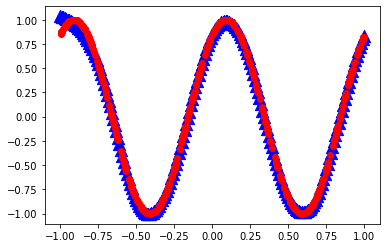

In [79]:
x, y = Sinusoid(1, 1, 1).get_sample(500, minx=-1, maxx=1)
x.squeeze_(0)
y.squeeze_(0)
model2 = copy.deepcopy(model).to(torch.device('cpu'))
# model2 = SimpleMLP([1, 256, 64, 1])
lloss = []
opt = torch.optim.Adam(model2.parameters(), lr=1e-2)
for i in range(200):
    loss = ((y - model2(x))**2).mean()
    opt.zero_grad()
    loss.backward()
    opt.step()
    lloss.append(loss.item())
print(x.shape)
x2 = torch.range(-1, 1, 1/100).unsqueeze(-1)
print(x2.shape)
plt.scatter(x2.numpy(), model2(x2).detach().numpy(), c='b', marker='^', s=150)
plt.scatter(x.numpy(), y.numpy(), c='r')
plt.show()

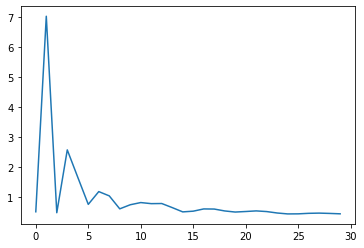

In [30]:
plt.plot(lloss)

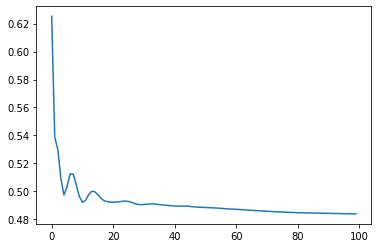

In [31]:
plt.plot(lloss)

# Make a gif

In [82]:
x, y = Sinusoid(1, 1, 1).get_sample(10, minx=-1, maxx=1)
x4, y4 = Sinusoid(1, 1, 1).get_sample(500, minx=-1, maxx=1)
x2 = torch.range(-1, 1, 1/100).unsqueeze(-1)
x.squeeze_(0)
y.squeeze_(0)
model2 = copy.deepcopy(model).to(torch.device('cpu'))
model3 = SimpleMLP([1, 8, 8, 1])
lloss2 = []
lloss3 = []
opt2 = torch.optim.Adam(model2.parameters(), lr=1e-2)
opt3 = torch.optim.Adam(model3.parameters(), lr=1e-2)
for step in range(200):
    loss2 = ((y - model2(x))**2).mean()
    loss3 = ((y - model3(x))**2).mean()
    opt2.zero_grad()
    opt3.zero_grad()
    loss2.backward()
    loss3.backward()
    opt2.step()
    opt3.step()
    lloss2.append(loss2.item())
    lloss3.append(loss3.item())
    plt.ylim([-1.5, 1.5])
    plt.xlabel("iteration number " + str(step))
    plt.scatter(x2.numpy(), model2(x2).detach().numpy(), c='b')
    plt.scatter(x2.numpy(), model3(x2).detach().numpy(), c='black')
    plt.scatter(x.numpy(), y.numpy(), c='orange', marker='^', s=150)
    plt.scatter(x4.numpy(), y4.numpy(), c='r')
    plt.savefig('imgs/sine'+str(step)+'.jpg')
    plt.clf()
    plt.ylim(auto=True)
    plt.plot(lloss2, c='b')
    plt.plot(lloss3, c='black')
    plt.savefig('imgs/loss'+str(step)+'.jpg')
    plt.clf()
    if step%10==0:
        print(step)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


<Figure size 432x288 with 0 Axes>